**Importing Dependincies**






In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics

**Importing The Data**

In [4]:
obesity_data = pd.read_csv('/content/obesity_data.csv')

In [5]:
obesity_data.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [6]:
obesity_data.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
PhysicalActivityLevel,0
ObesityCategory,0


In [7]:
obesity_data.shape

(1000, 7)

**Pre-Processing Data**

Label Encoding

In [8]:
obesity_data['Gender'] = obesity_data['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [9]:
#knwoing how many values in ObesityCategory
obesity_data['ObesityCategory'].value_counts()


,count
ObesityCategory,
Normal weight,371
Overweight,295
Obese,191
Underweight,143


In [10]:
obesity_data['ObesityCategory'] = obesity_data['ObesityCategory'].apply(lambda  x:0 if x=='Normal weight' else 1 if x=='Overweight' else 2 if x=='Obese' else 3)

In [11]:
obesity_data['ObesityCategory'].value_counts()


,count
ObesityCategory,
0,371
1,295
2,191
3,143


In [12]:
obesity_data.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,0
1,69,1,164.127306,89.959256,33.395209,2,2
2,46,0,168.072202,72.930629,25.817737,4,1
3,32,1,168.459633,84.886912,29.912247,3,1
4,60,1,183.568568,69.038945,20.487903,3,0


In [13]:
obesity_data.describe()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,0.523000,170.052417,71.205769,24.888317,2.534000,1.106000
std,18.114267,0.499721,10.309971,15.509849,6.193912,1.116284,1.060136
min,18.000000,0.000000,136.115719,26.065730,8.470572,1.000000,0.000000
25%,35.000000,0.000000,163.514205,61.129629,20.918068,2.000000,0.000000
50%,50.000000,1.000000,169.801665,71.929072,24.698647,3.000000,1.000000
75%,66.000000,1.000000,177.353596,81.133746,28.732132,4.000000,2.000000
max,79.000000,1.000000,201.419670,118.907366,50.791898,4.000000,3.000000


**Correlation Between Data**

1- Positive Correlation

2- Negative Correlation

In [14]:
correlation = obesity_data.corr()

<Axes: >

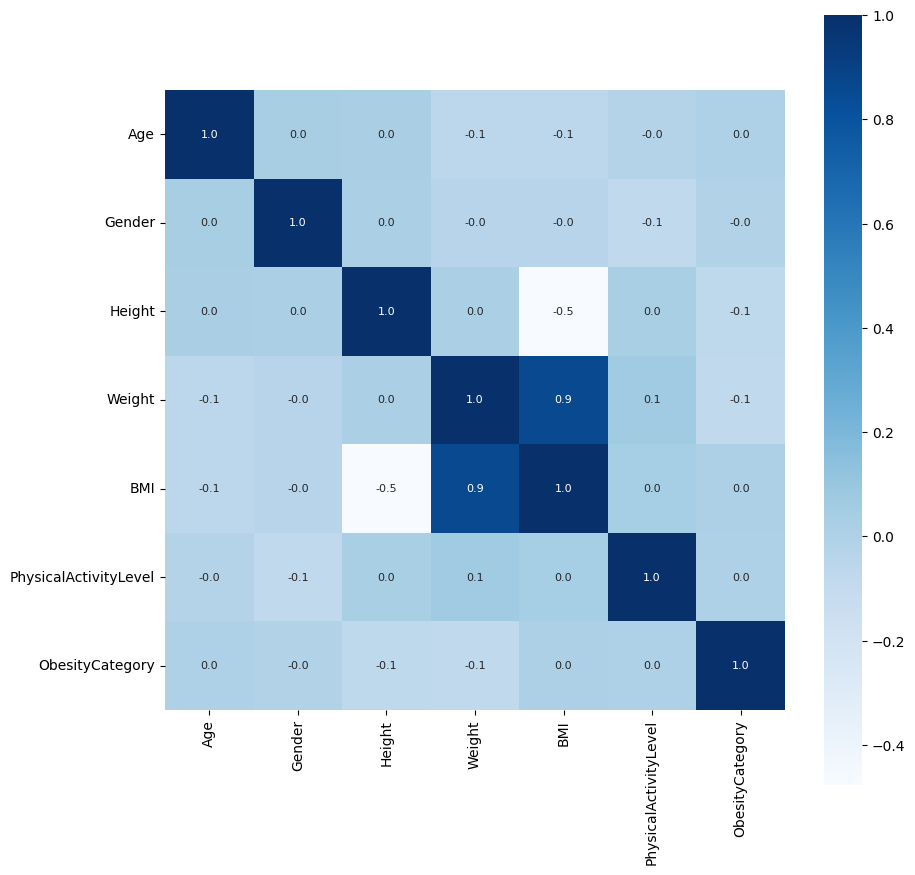

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [16]:
x = obesity_data.drop(columns='ObesityCategory', axis=1)
y = obesity_data['ObesityCategory']

In [17]:
print (x)
print (y)

     Age  Gender      Height     Weight        BMI  PhysicalActivityLevel
0     56       1  173.575262  71.982051  23.891783                      4
1     69       1  164.127306  89.959256  33.395209                      2
2     46       0  168.072202  72.930629  25.817737                      4
3     32       1  168.459633  84.886912  29.912247                      3
4     60       1  183.568568  69.038945  20.487903                      3
..   ...     ...         ...        ...        ...                    ...
995   18       1  155.588674  64.103182  26.480345                      4
996   35       0  165.076490  97.639771  35.830783                      1
997   49       0  156.570956  78.804284  32.146036                      1
998   64       1  164.192222  57.978115  21.505965                      4
999   66       0  178.537130  74.962164  23.517168                      1

[1000 rows x 6 columns]
0      0
1      2
2      1
3      1
4      0
      ..
995    1
996    2
997    2
998   

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state = 2)

In [19]:
print (x.shape, x_train.shape, x_test.shape)

(1000, 6) (800, 6) (200, 6)


**Model Training**

In [20]:
model = XGBClassifier()

In [21]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [22]:
#Accuracy for prediction on training data
training_data_prediction = model.predict(x_train)

In [23]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  1.0
Mean Absolute Error :  0.0


In [24]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  1.0
Mean Absolute Error :  0.0


In [25]:
input_data = (56,	1,	173.575262,	71.982051,	23.891783,	4)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is Normal')

elif (prediction[0] == 1):
  print('The person is Overweight')

elif (prediction[0] == 2):
  print('The person is Obese')
else :
  print('The person is Underweight')

[0]
The person is Normal


**Saving the trained Model**


In [26]:
import pickle

In [27]:
filename = 'obesity_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [28]:
#loading the saved model
loaded_model = pickle.load(open('obesity_model.sav', 'rb'))

In [29]:
for column in x.columns:
  print(column)

Age
Gender
Height
Weight
BMI
PhysicalActivityLevel
